# Product Recommendation System for e-commerce businesses

A well developed recommendation system will help businesses improve their shopper's 
experience on website and result in better customer acquisition and retention.

The recommendation system designed below is based on the journey of a new customer from the 
time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

#### The recommendation system is designed in 3 parts based on the business context:

Recommendation system part I: Product pupularity based system targetted at new customers

Recommendation system part II: Model-based collaborative filtering system based on customer's
purchase history and ratings provided by other users who bought items similar items

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

## Recommendation System - Part I

Product popularity based recommendation system targeted at new customers
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's 
website and is very useful to cold start a recommendation engine.

Dataset  : Amazon product review dataset - This is a dataset ( spanning May 1996 - July 2014) related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

It contains

  - the unique UserId (Customer Identification),
  - the product ASIN (Amazon's unique product identification code for each product),
  - Ratings (ranging from 1-5 based on customer satisfaction) and
  - the Timestamp of the rating (in UNIX time)

In [46]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import TruncatedSVD     # This transformer performs linear dimensionality
                                                  # reduction by means of truncated singular value

In [3]:
data = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Recommender system/ratings_Beauty.csv")

In [4]:
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [6]:
data.shape

(2023070, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [8]:
data.isnull().sum()/len(data)*100

UserId       0.0
ProductId    0.0
Rating       0.0
Timestamp    0.0
dtype: float64

In [12]:
# dataframe for most popular products
popular_products = pd.DataFrame(data.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating',ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


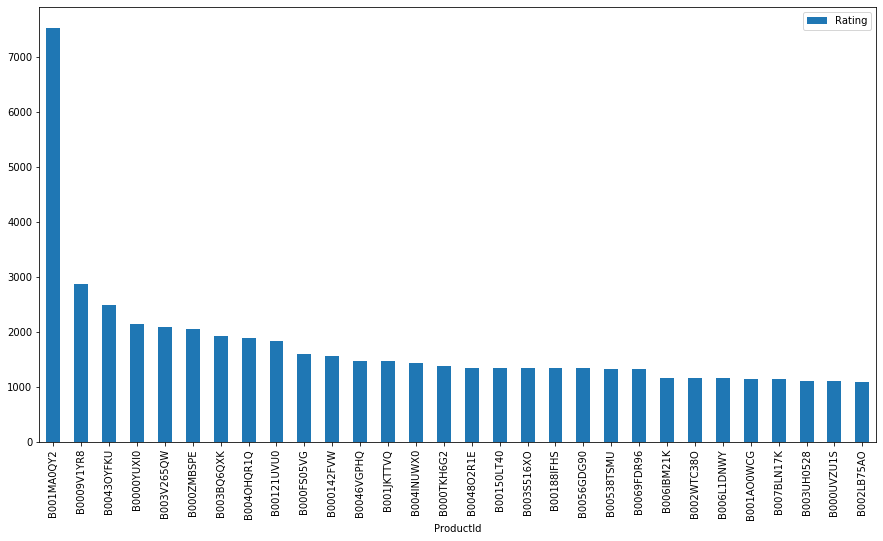

In [18]:
# plot the 30 most popular products
most_popular.head(30).plot(kind='bar',figsize=(15,8));

##### Insights:
    the above graph shows the most popular products (arranged in descending order) sold by the business on their website
    For eaxmple, ProductID #B001MA0QY2 has sales of over 7000, the next most popular ProductID #B0009V1YR8 has sales 
    of 3000, etc.
    
    
 Part I, Recommendation engine based on targeting the new customers with the most popular products sold on a business's website is done.
 
 Now we move to Part II, the recommendation engine based on customer's purchase history

### Recommendation System - Part II

##### Model-based collaborative filtering system

- Recommend items to users/customers based on purchase history and similarity of ratings provided by other users who bought items similar to that of a particular customer
- A model based collaborative filtering technique is chosen here as it helps in predicting products for a particular user by identifying patterns based on preferences from multiple user data

###### Utility Matrix based on products sold and user reviews

Utility Matrix : A Utlity matrix consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce/scarce/scattered as none of the users would buy all the items in the list, hence, most of the values are unknown.
In most cases, the cells in the matrix are empty, as users only rate a few items. It’s highly unlikely for every user to rate or react to every item available. A matrix with mostly empty cells is called sparse, and the opposite to that (a mostly filled matrix) is called dense.

The data used in a recommendation system is divided in two categories: the Users and the Items. These rating values are collected in a matrix called utility matrix, in which each row i represents the list of rated items for user i while each column j lists all the users who have rated item j.

In [19]:
# Take subset
amazon_ratings = data.head(10000)

In [23]:
ratings_utility_matrix = amazon_ratings.pivot_table(values='Rating',index='UserId',columns='ProductId',fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# As expected, the utility matrix obtained above is sparce, the unknown values are filled with 0.

In [24]:
ratings_utility_matrix.shape

(9697, 886)

In [25]:
# Transpose the matrix
ratings_utility_matrix = ratings_utility_matrix.T
ratings_utility_matrix.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Decomposing the matrix
# Matrix decomposition is matrix factorization which separates a matrix into two other matrices that are typically much easier 
# to solve than the original matrix. Not only does this make the problem easy to solve,
# but it reduces the amount of time required by a computer to calculate the answe

SVD =  TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_utility_matrix)

In [30]:
decomposed_matrix.shape

(886, 10)

In [32]:
# Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.77176758, -0.80482662, ...,  0.26139057,
        -0.75332335, -0.39022307],
       [-0.77176758,  1.        ,  0.9189048 , ..., -0.28961745,
         0.52644166, -0.02408144],
       [-0.80482662,  0.9189048 ,  1.        , ..., -0.27688205,
         0.71728404,  0.27721019],
       ...,
       [ 0.26139057, -0.28961745, -0.27688205, ...,  1.        ,
        -0.19280491, -0.0897717 ],
       [-0.75332335,  0.52644166,  0.71728404, ..., -0.19280491,
         1.        ,  0.7848098 ],
       [-0.39022307, -0.02408144,  0.27721019, ..., -0.0897717 ,
         0.7848098 ,  1.        ]])

In [33]:
correlation_matrix.shape

(886, 886)

In [36]:
# Isolating Product ID #6117036094 from the Correlation Matrix

# Assuming the customer buys Product ID #6117036094 (randomly chosen)

ratings_utility_matrix.index[99]

'6117036094'

In [37]:
# Index # of product ID purchased by customer

i = '6117036094'
product_names = list(ratings_utility_matrix.index)
product_ID = product_names.index(i)
product_ID

99

In [38]:
# Correlation of all items with the item purchased (which is '6117036094') by this customer based on 
# items rated by other customers who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [39]:
# These are correlations of all the other products with the product ('6117036094')
# that we assumed the customer has purchased

correlation_product_ID

array([-0.87005108,  0.86440828,  0.95875374,  0.14139229, -0.0955867 ,
        0.44345051,  0.46912213, -0.96428447,  0.44327161, -0.94899143,
        0.46912213, -0.94884773,  0.46992096,  0.45529531,  0.44345051,
        0.46912213,  0.46912213,  0.93529832,  0.46992054,  0.98245113,
       -0.94753196, -0.99539984,  0.46658803, -0.94882042, -0.94763424,
        0.24569946,  0.23764837, -0.02636002, -0.94882042,  0.24198231,
        0.25400033,  0.44347852,  0.418176  ,  0.24613037, -0.94885775,
        0.44345051,  0.24613037,  0.99750961,  0.44307789,  0.00596797,
        0.00488158,  0.24569946,  0.44180032,  0.44345051,  0.44345051,
        0.44345051, -0.94882042,  0.44345051,  0.44331199,  0.00596797,
       -0.85531668, -0.9375941 ,  0.92728282,  0.98441522, -0.31459817,
        0.32957783, -0.48471889, -0.87384342,  0.9902482 , -0.95937902,
       -0.8515448 , -0.94988265,  0.72266532,  0.97276866,  0.97395995,
       -0.91849266,  0.02597714,  0.92706641, -0.18765864, -0.95

In [44]:
# Recommending top 10 highly correlated products (with more than 0.90 correlation with the purchased product '6117036094')
# in sequence (the above matrix correlation_product_ID)

Recommend = list(ratings_utility_matrix.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['0733001998',
 '1304196070',
 '1304351475',
 '1304622622',
 '1451646526',
 '1457982633',
 '1987958179',
 '3292000971',
 '3423470476',
 '4057362843']

In [ ]:
# The above are the Top 10 items/products that are similar to the product already bought by the customer
# Here are the top 10 products to be displayed by the recommendation system to the above customer based on the 
# purchase history of other customers in the website.

### Recommendation System - Part III

- For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. 
- The product recommendations can be based on textual clustering analysis given in product description.

Dataset : Home Depot's dataset with product dataset.

In [47]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

##### Item to item based recommendation system based on product description

Applicable when business is setting up its e-commerce website for the first time

In [48]:
product_desc = pd.read_csv("C:/Users/mncedisi.mncwabe/Videos/Practice/Recommender system/product_descriptions.csv")

In [49]:
product_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [50]:
product_desc.shape

(124428, 2)

In [51]:
product_desc.isnull().sum()/len(product_desc)*100

product_uid            0.0
product_description    0.0
dtype: float64